<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-29-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [5]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-05-30 02:32:48,34.223334,-82.461707,39,0,0,39,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-30 02:32:48,30.295065,-92.414197,401,23,0,378,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-30 02:32:48,37.767072,-75.632346,827,12,0,815,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-30 02:32:48,43.452658,-116.241552,803,22,0,781,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-30 02:32:48,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [8]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-28,1712637,95705,23007.0,1353.0
2020-05-29,1736571,96891,23934.0,1186.0
2020-05-30,1759693,97880,23122.0,989.0


In [9]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-26,96733,3814,2175.0,19.0
2020-05-27,98980,3884,2247.0,70.0
2020-05-28,101697,3973,2717.0,89.0
2020-05-29,103886,4068,2189.0,95.0
2020-05-30,106878,4156,2992.0,88.0


In [10]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1759693
Total deaths = 97880


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
NY,369660,1635721,0,3619.0,89400.0,1124.0,0.0,857.0,0.0,65609.0,A,5/30/2020 00:00,90b281f78f672be8e416d33aae24c87ddbb45283,2020-05-30T20:00:00Z,23848,89400.0,2005381,2005381,2005381,36,68.0,206.0,59875.0,1376.0,61251.0
NJ,159608,585700,0,2626.0,17121.0,672.0,0.0,499.0,0.0,26301.0,A+,5/30/2020 13:00,4e7c5ab246a9f9b89dee73a260af1241eff5870d,2020-05-30T20:00:00Z,11634,17121.0,745308,745308,745308,34,103.0,161.0,28133.0,764.0,28897.0
IL,118917,758188,0,3336.0,0.0,925.0,0.0,661.0,0.0,0.0,A,5/30/2020 00:00,c47396b4895dcac98a28e3f9c6a7b0e66fe2090d,2020-05-30T20:00:00Z,5330,0.0,877105,877105,877105,17,60.0,0.0,23881.0,1462.0,25343.0
CA,106878,1781717,0,4215.0,0.0,1273.0,0.0,0.0,0.0,0.0,B,5/30/2020 00:00,42bd1ee85b659102f837c87be6d91b631dbdf30a,2020-05-30T20:00:00Z,4156,0.0,1888595,1888595,1888595,06,88.0,0.0,50125.0,2992.0,53117.0
MA,96301,486218,0,1904.0,9789.0,453.0,0.0,0.0,0.0,0.0,A,5/30/2020 10:00,57f87981bed56ab7664f345d772079fc7f32587b,2020-05-30T20:00:00Z,6768,9789.0,582519,582519,582519,25,50.0,64.0,9985.0,789.0,10774.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [12]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
123,2020-05-24,1635760,14163694,91941,20806.0,654.0,0.929571
124,2020-05-25,1654829,14604942,92464,19069.0,523.0,0.940408
125,2020-05-26,1671035,14907041,93093,16206.0,629.0,0.949617
126,2020-05-27,1689630,15192481,94352,18595.0,1259.0,0.960185
127,2020-05-28,1712637,15607239,95705,23007.0,1353.0,0.973259
128,2020-05-29,1736571,16099515,96891,23934.0,1186.0,0.986860
129,2020-05-30,1759693,16495443,97880,23122.0,989.0,1.000000


In [13]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
81,2020-05-24,92710,1582745,3774,2079.0,66.0,0.867438
82,2020-05-25,94558,1644102,3795,1848.0,21.0,0.884728
83,2020-05-26,96733,1696396,3814,2175.0,19.0,0.905079
84,2020-05-27,98980,1736894,3884,2247.0,70.0,0.926103
85,2020-05-28,101697,1790559,3973,2717.0,89.0,0.951524
86,2020-05-29,103886,1835478,4068,2189.0,95.0,0.972005
87,2020-05-30,106878,1888595,4156,2992.0,88.0,1.000000


In [14]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-26,1671035,13236006,1549,36609.0,201872.0,8585.0,7899.0,4215.0,650.0,384902.0,93093,201872.0,14908590,14907041,14907041,629.0,17302.0,285893.0,16206.0,302099.0
2020-05-27,1689630,13502851,3132,37253.0,203474.0,8551.0,8015.0,4222.0,666.0,391508.0,94352,203474.0,15195613,15192481,15192481,1259.0,1602.0,266845.0,18595.0,285440.0
2020-05-28,1712637,13894602,1906,36967.0,205974.0,8389.0,8109.0,4080.0,676.0,399991.0,95705,205974.0,15609145,15607239,15607239,1353.0,2500.0,391751.0,23007.0,414758.0
2020-05-29,1736571,14362944,2978,35871.0,207694.0,8175.0,8235.0,4032.0,689.0,406446.0,96891,207694.0,16102493,16099515,16099515,1186.0,1720.0,468342.0,23934.0,492276.0
2020-05-30,1759693,14735750,1668,34650.0,209134.0,7956.0,8305.0,4004.0,698.0,416461.0,97880,209134.0,16497111,16495443,16495443,989.0,1440.0,372806.0,23122.0,395928.0


In [15]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-26,96733,1599663,0,4404.0,0.0,1392.0,0.0,0.0,0.0,0.0,3814,0.0,1696396,1696396,1696396,19.0,0.0,50119.0,2175.0,52294.0
2020-05-27,98980,1637914,0,4544.0,0.0,1407.0,0.0,0.0,0.0,0.0,3884,0.0,1736894,1736894,1736894,70.0,0.0,38251.0,2247.0,40498.0
2020-05-28,101697,1688862,0,4529.0,0.0,1325.0,0.0,0.0,0.0,0.0,3973,0.0,1790559,1790559,1790559,89.0,0.0,50948.0,2717.0,53665.0
2020-05-29,103886,1731592,0,4414.0,0.0,1328.0,0.0,0.0,0.0,0.0,4068,0.0,1835478,1835478,1835478,95.0,0.0,42730.0,2189.0,44919.0
2020-05-30,106878,1781717,0,4215.0,0.0,1273.0,0.0,0.0,0.0,0.0,4156,0.0,1888595,1888595,1888595,88.0,0.0,50125.0,2992.0,53117.0


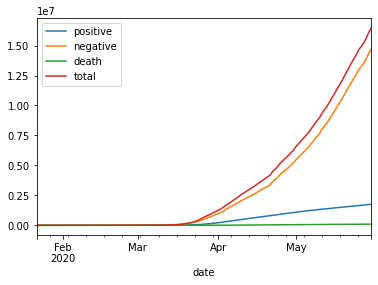

In [16]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

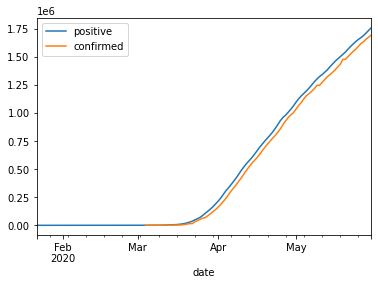

In [17]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [18]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1746019
dead          102809
dtype: int64

In [19]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    106622
dead           4077
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [21]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-05-30 02:32:48,34.223334,-82.461707,39,0,0,39,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-30 02:32:48,30.295065,-92.414197,401,23,0,378,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-30 02:32:48,37.767072,-75.632346,827,12,0,815,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-30 02:32:48,43.452658,-116.241552,803,22,0,781,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-30 02:32:48,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [22]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1746019
Brazil             465166
Russia             387623
United Kingdom     272607
Spain              238564
Italy              232248
France             186923
Germany            182922
India              173491
Turkey             162120
Name: confirmed, dtype: int64

In [23]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,434,51261,0,14.0,0.0,0.0,0.0,2.0,0.0,368.0,A,5/30/2020 00:00,7e9def61fbdf180a244ebb5b99f80bd5e86cb276,2020-05-30T20:00:00Z,10,0.0,51695,51695,51695,02,0.0,0.0,2252.0,4.0,2256.0
AL,17359,194842,0,0.0,1826.0,0.0,583.0,0.0,349.0,9355.0,B,5/30/2020 00:00,03afb7755c739eee6331bbbf8a47b795a268ce8f,2020-05-30T20:00:00Z,618,1826.0,212201,212201,212201,01,13.0,26.0,2782.0,536.0,3318.0
AR,7013,119484,0,104.0,702.0,0.0,0.0,26.0,123.0,5166.0,A,5/30/2020 15:13,7ac01f0de9851ac82436925176ac541beac3e398,2020-05-30T20:00:00Z,133,702.0,126497,126497,126497,05,8.0,35.0,6254.0,475.0,6729.0
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/29/2020 00:00,06608d9492602ca9d2ca31d5475139e1db250af0,2020-05-30T20:00:00Z,0,0.0,174,174,174,60,0.0,0.0,0.0,0.0,0.0
AZ,19255,197792,0,975.0,2980.0,386.0,0.0,241.0,0.0,4657.0,A+,5/30/2020 00:00,d18c5c1f2730c2571ccc3b1653b6d7473a84afa3,2020-05-30T20:00:00Z,903,2980.0,217047,217047,217047,04,18.0,69.0,6444.0,790.0,7234.0


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [26]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-30,55424,2530,55424,1.000000
FL,2020-05-29,54497,2495,55424,0.983274
FL,2020-05-28,53285,2446,55424,0.961407
FL,2020-05-27,52634,2400,55424,0.949661
FL,2020-05-26,52255,2338,55424,0.942823
FL,2020-05-25,51746,2331,55424,0.933639
FL,2020-05-24,50867,2316,55424,0.917779


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

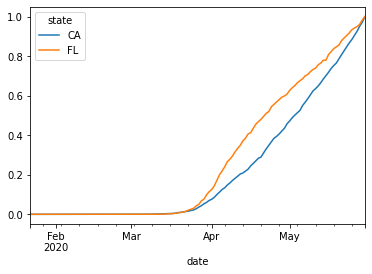

In [28]:
x = res.loc[:, ['CA','FL']].plot.line()

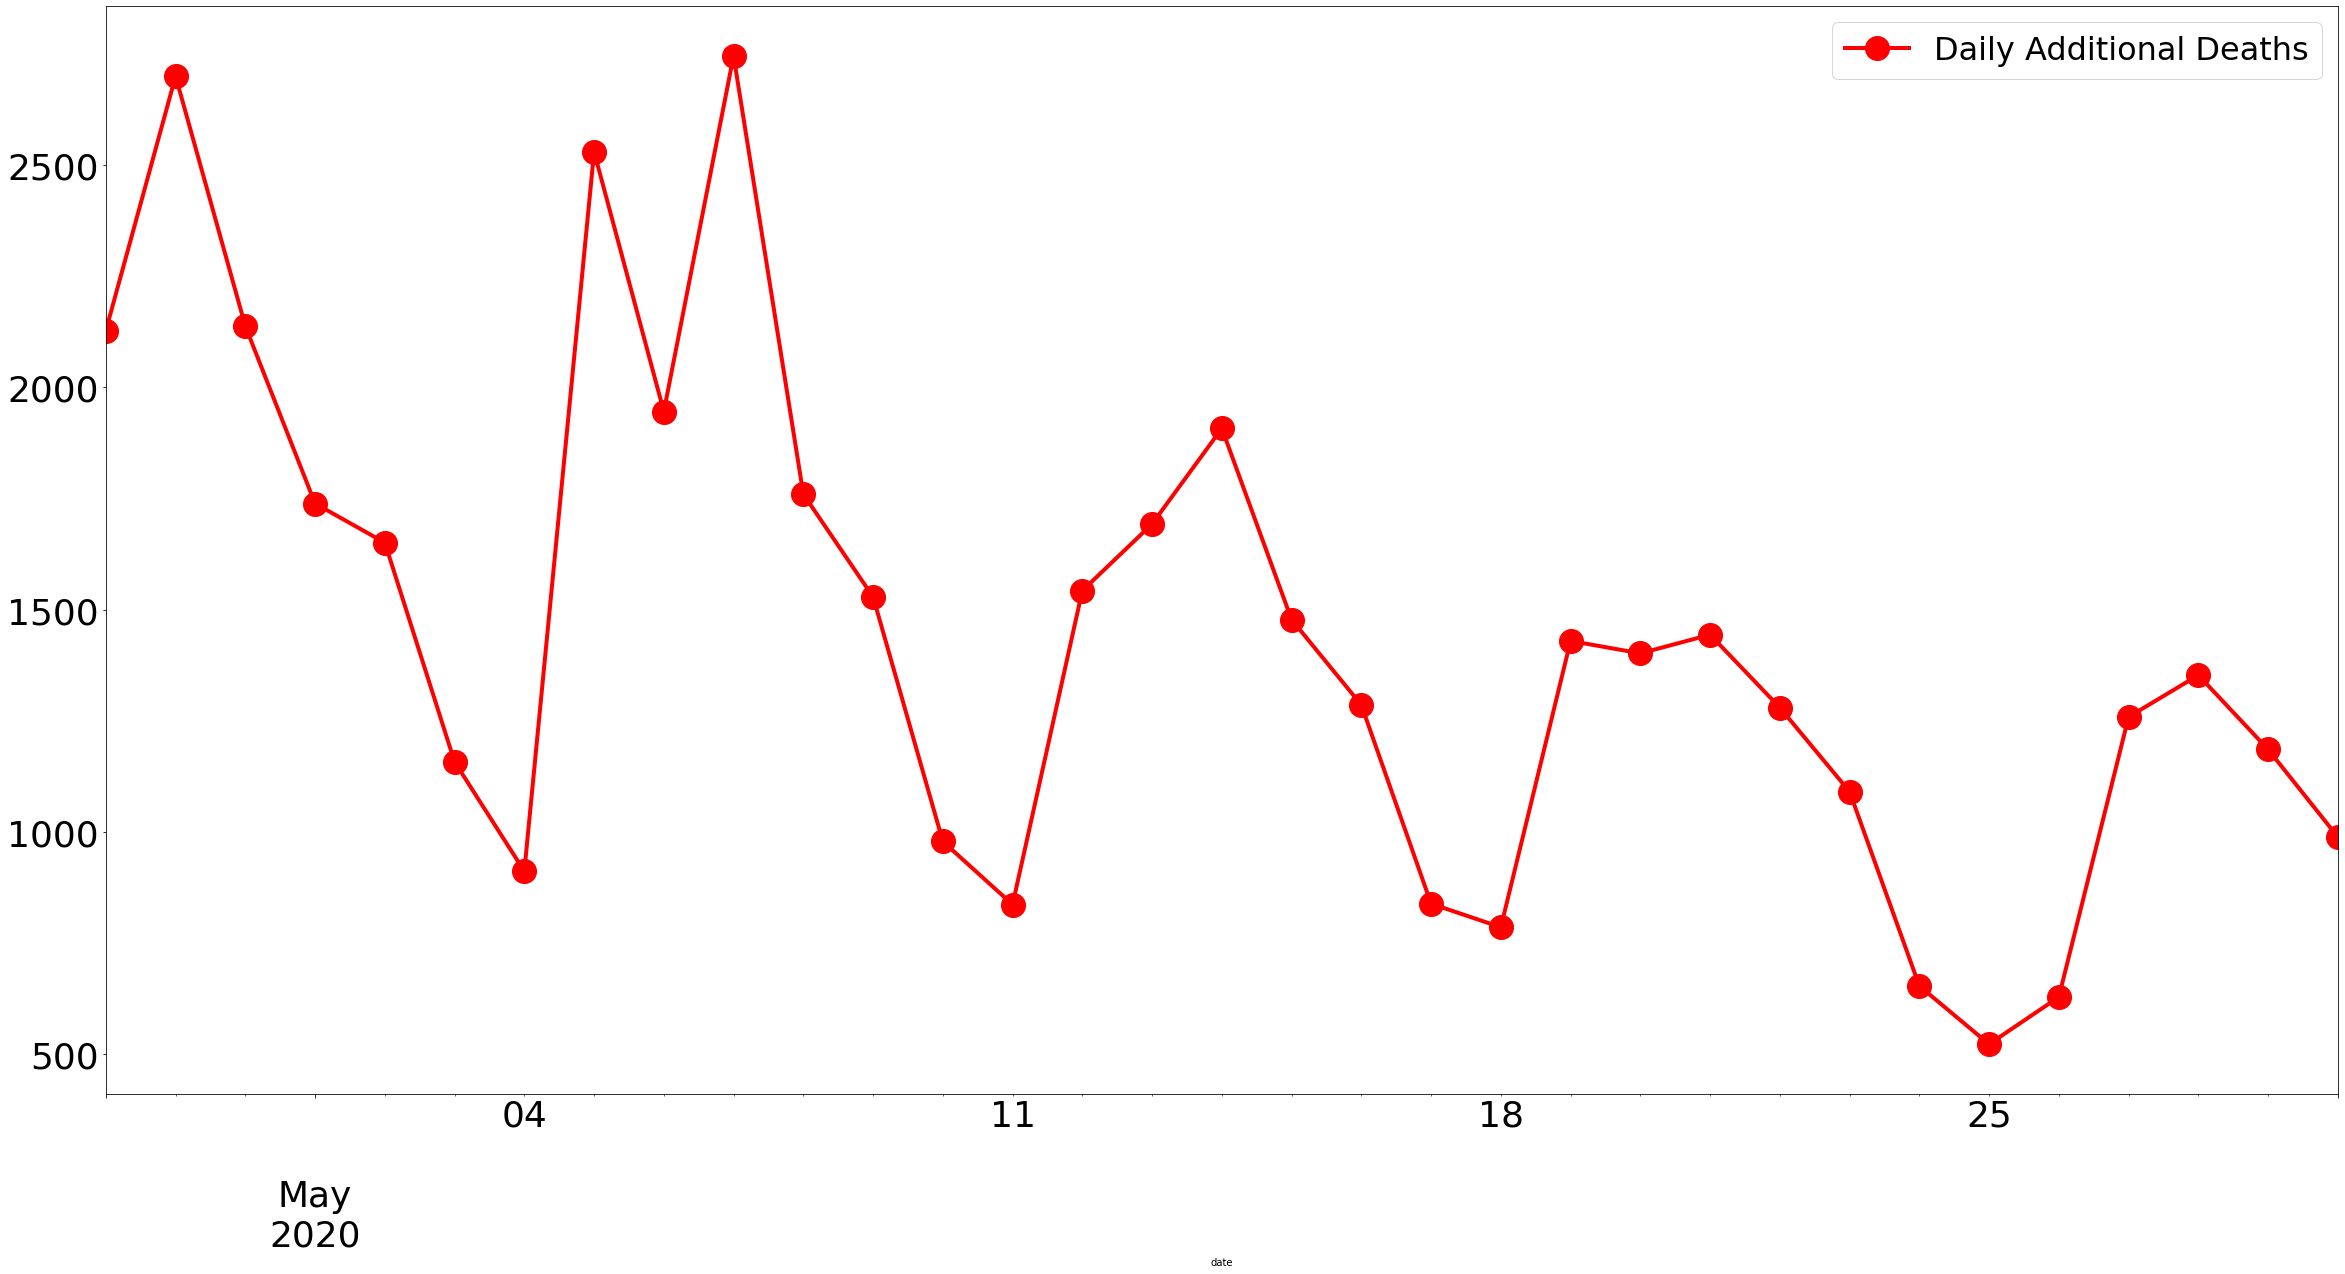

In [29]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


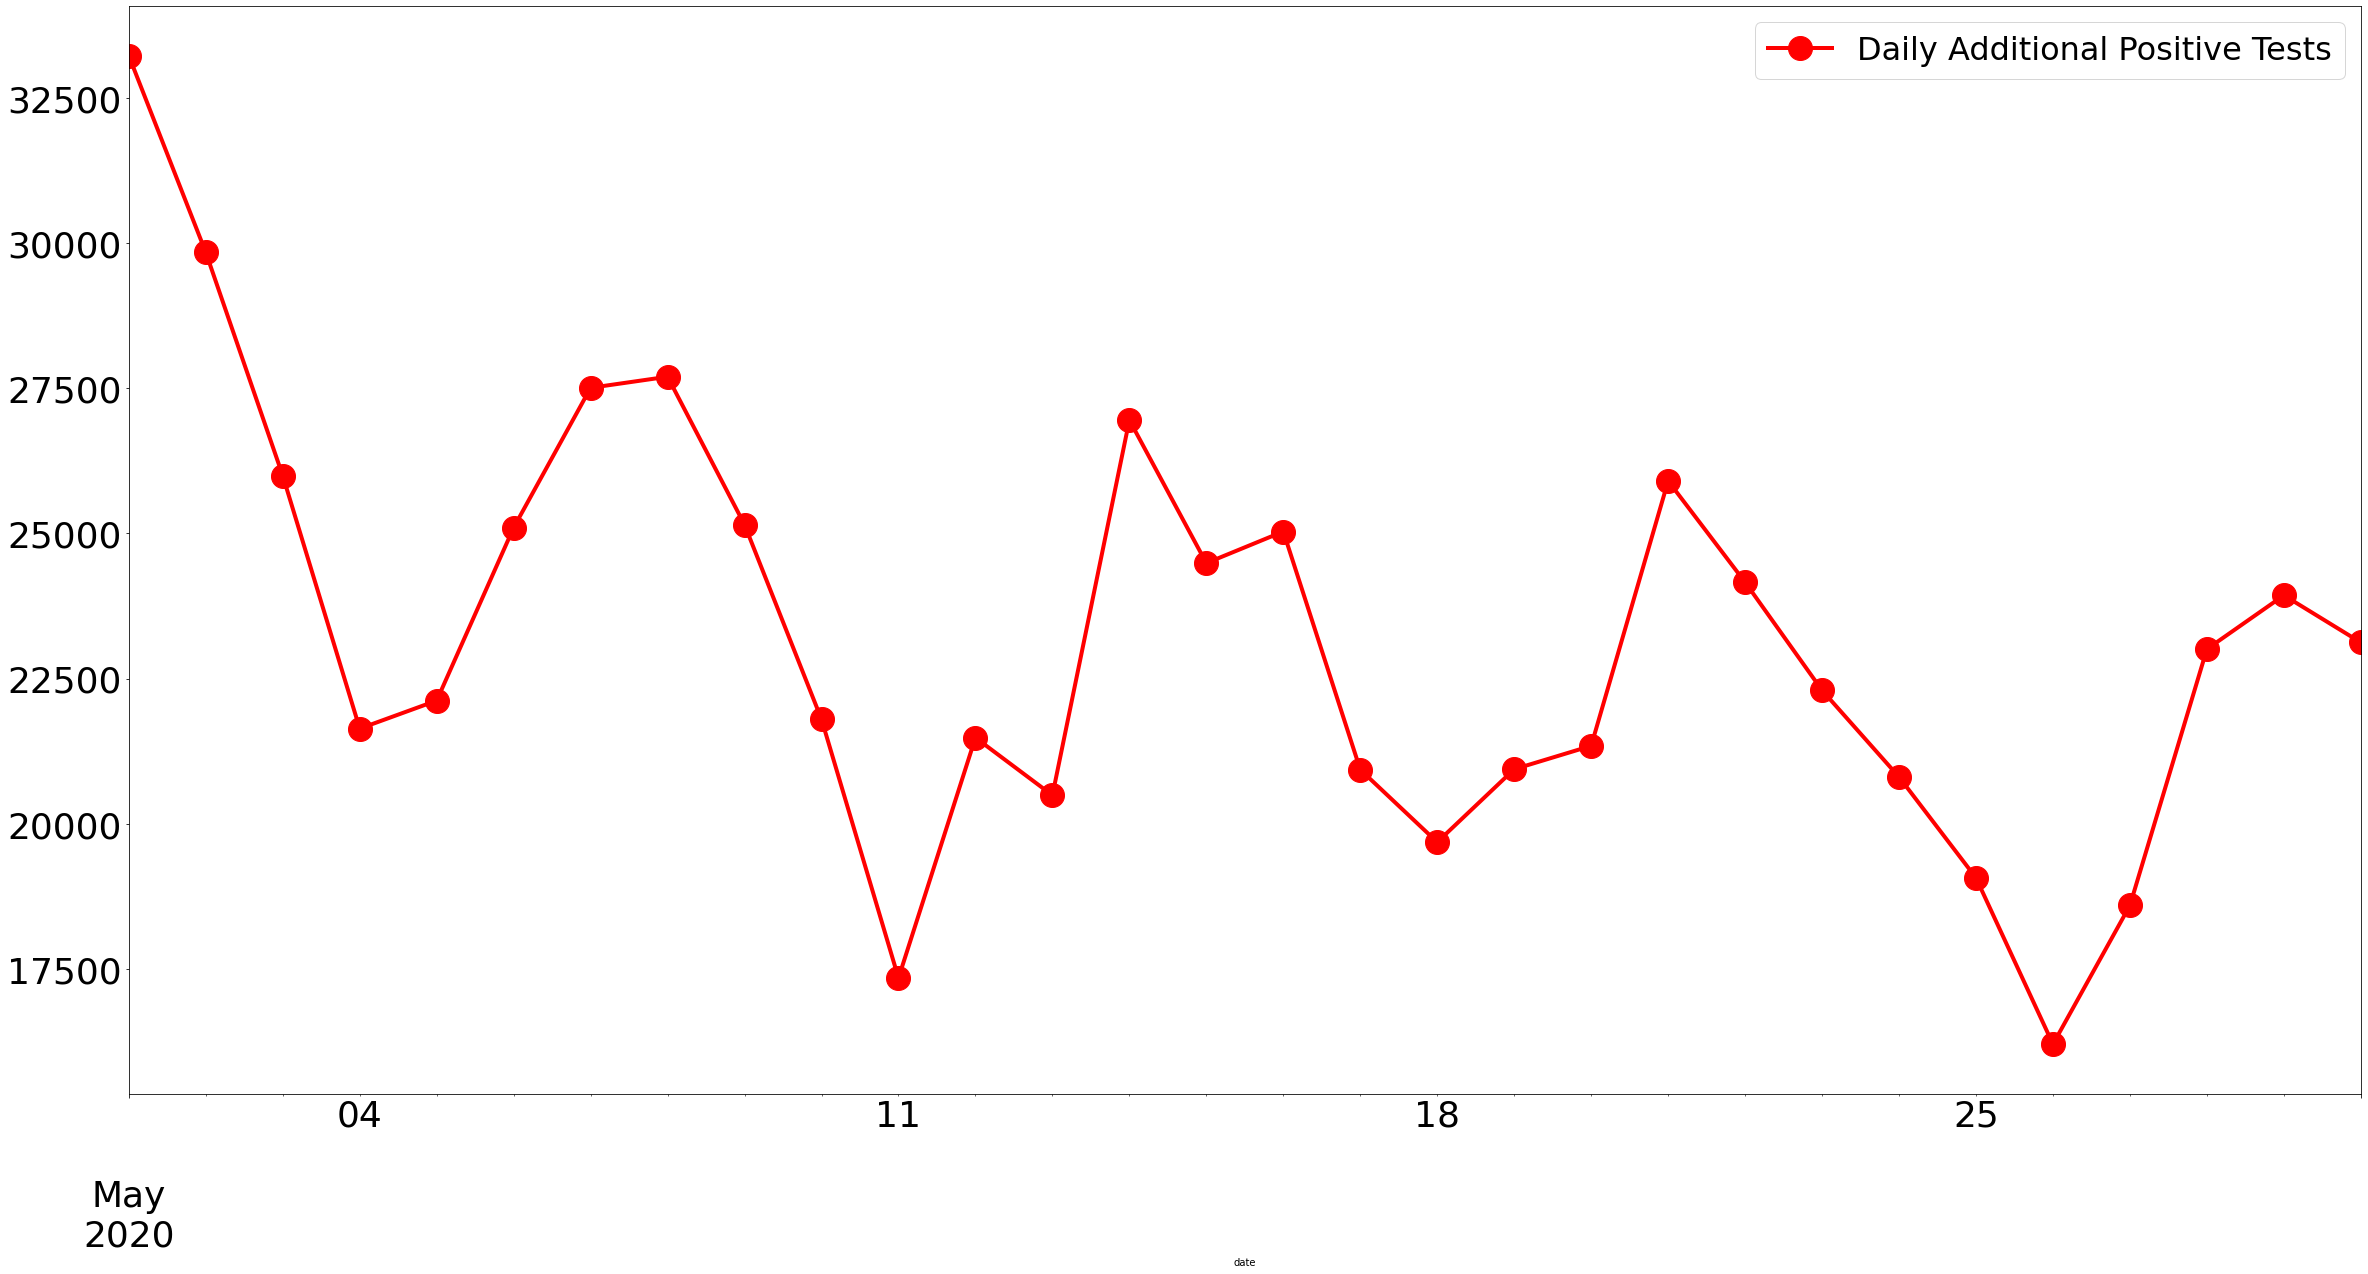

In [30]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


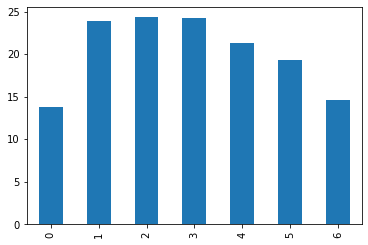

In [33]:
dfDoW.mean().deathIncrease.plot.bar()



In [34]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202016,14063.0,24260.0,844332.0,199843.0,1044175.0
202017,12864.0,18512.0,1319356.0,209064.0,1528420.0
202018,12704.0,24872.0,1462961.0,191865.0,1654826.0
202019,12402.0,18998.0,1747407.0,171010.0,1909104.0
202020,9584.0,12129.0,2324282.0,156723.0,2481005.0
202021,8087.0,15648.0,2548088.0,155132.0,2703220.0
202022,5939.0,25531.0,2207816.0,123933.0,2331749.0


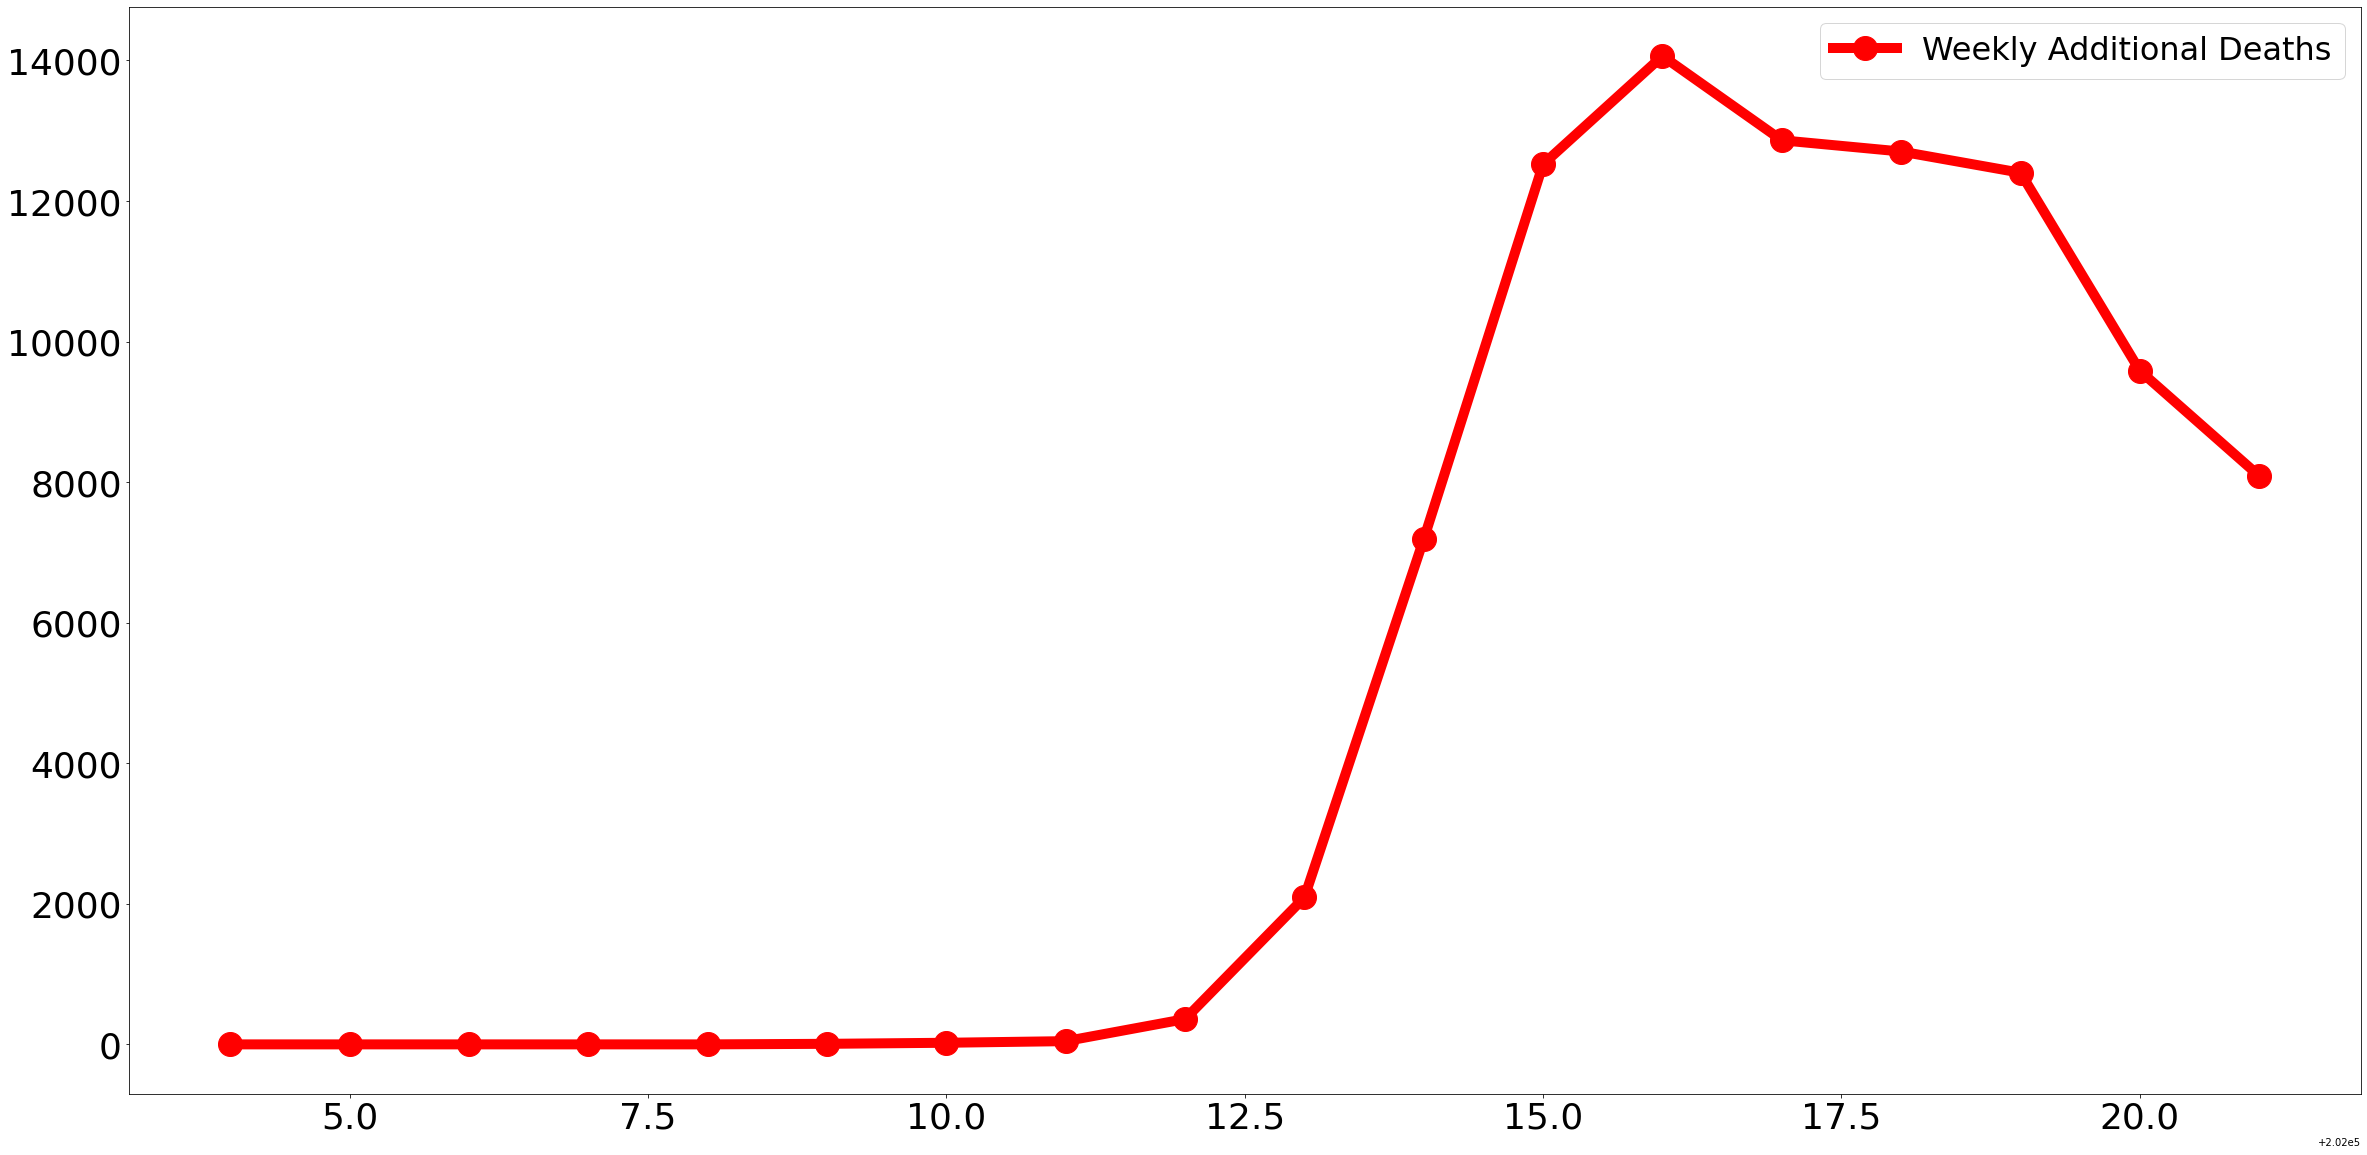

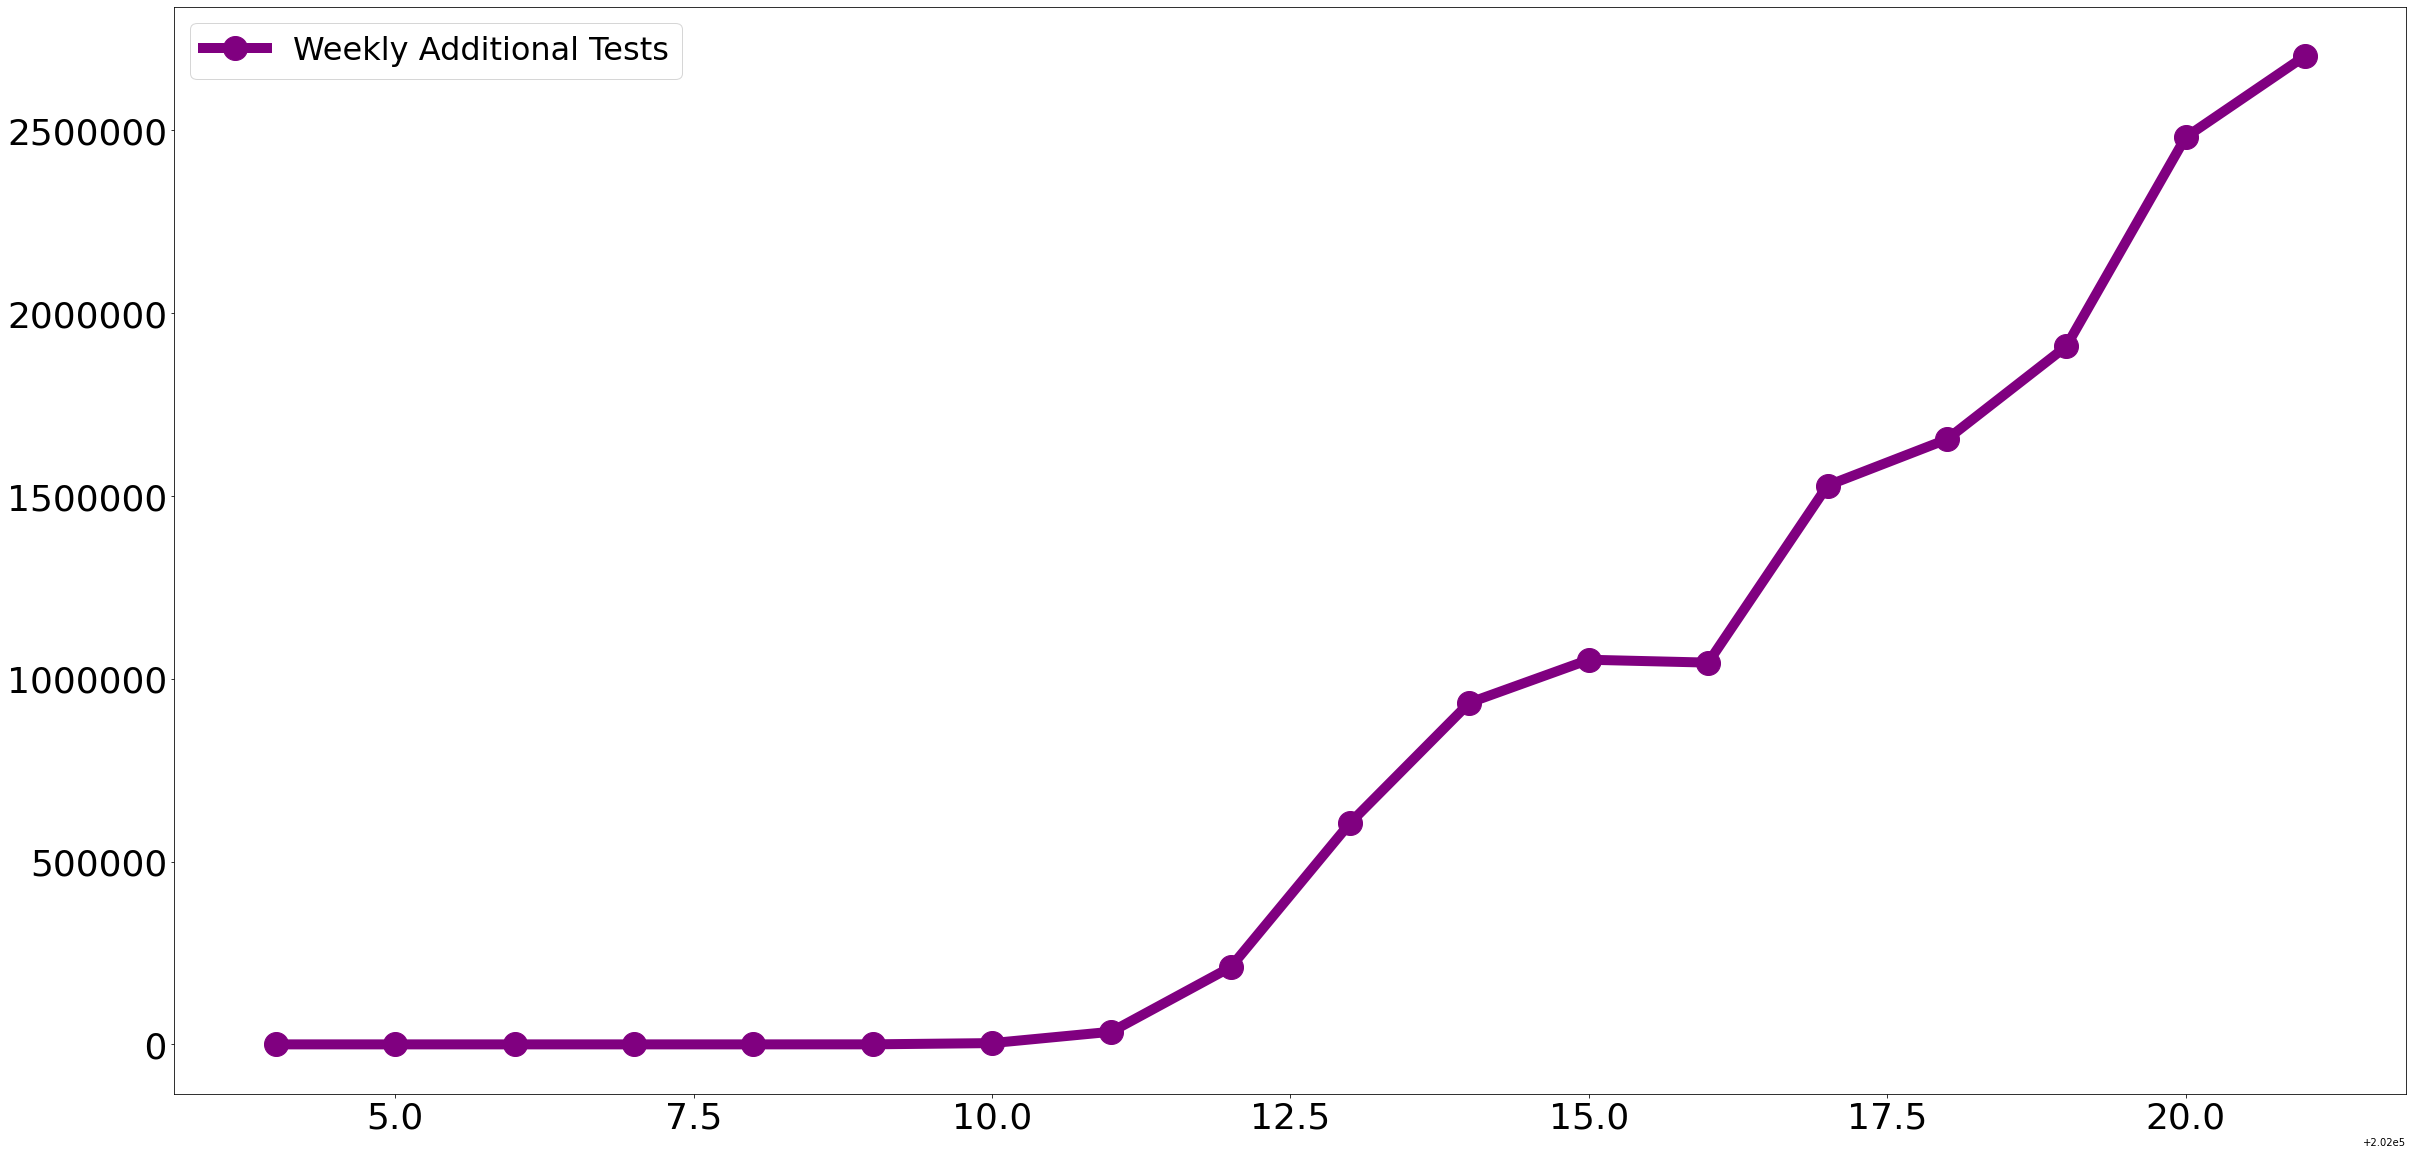

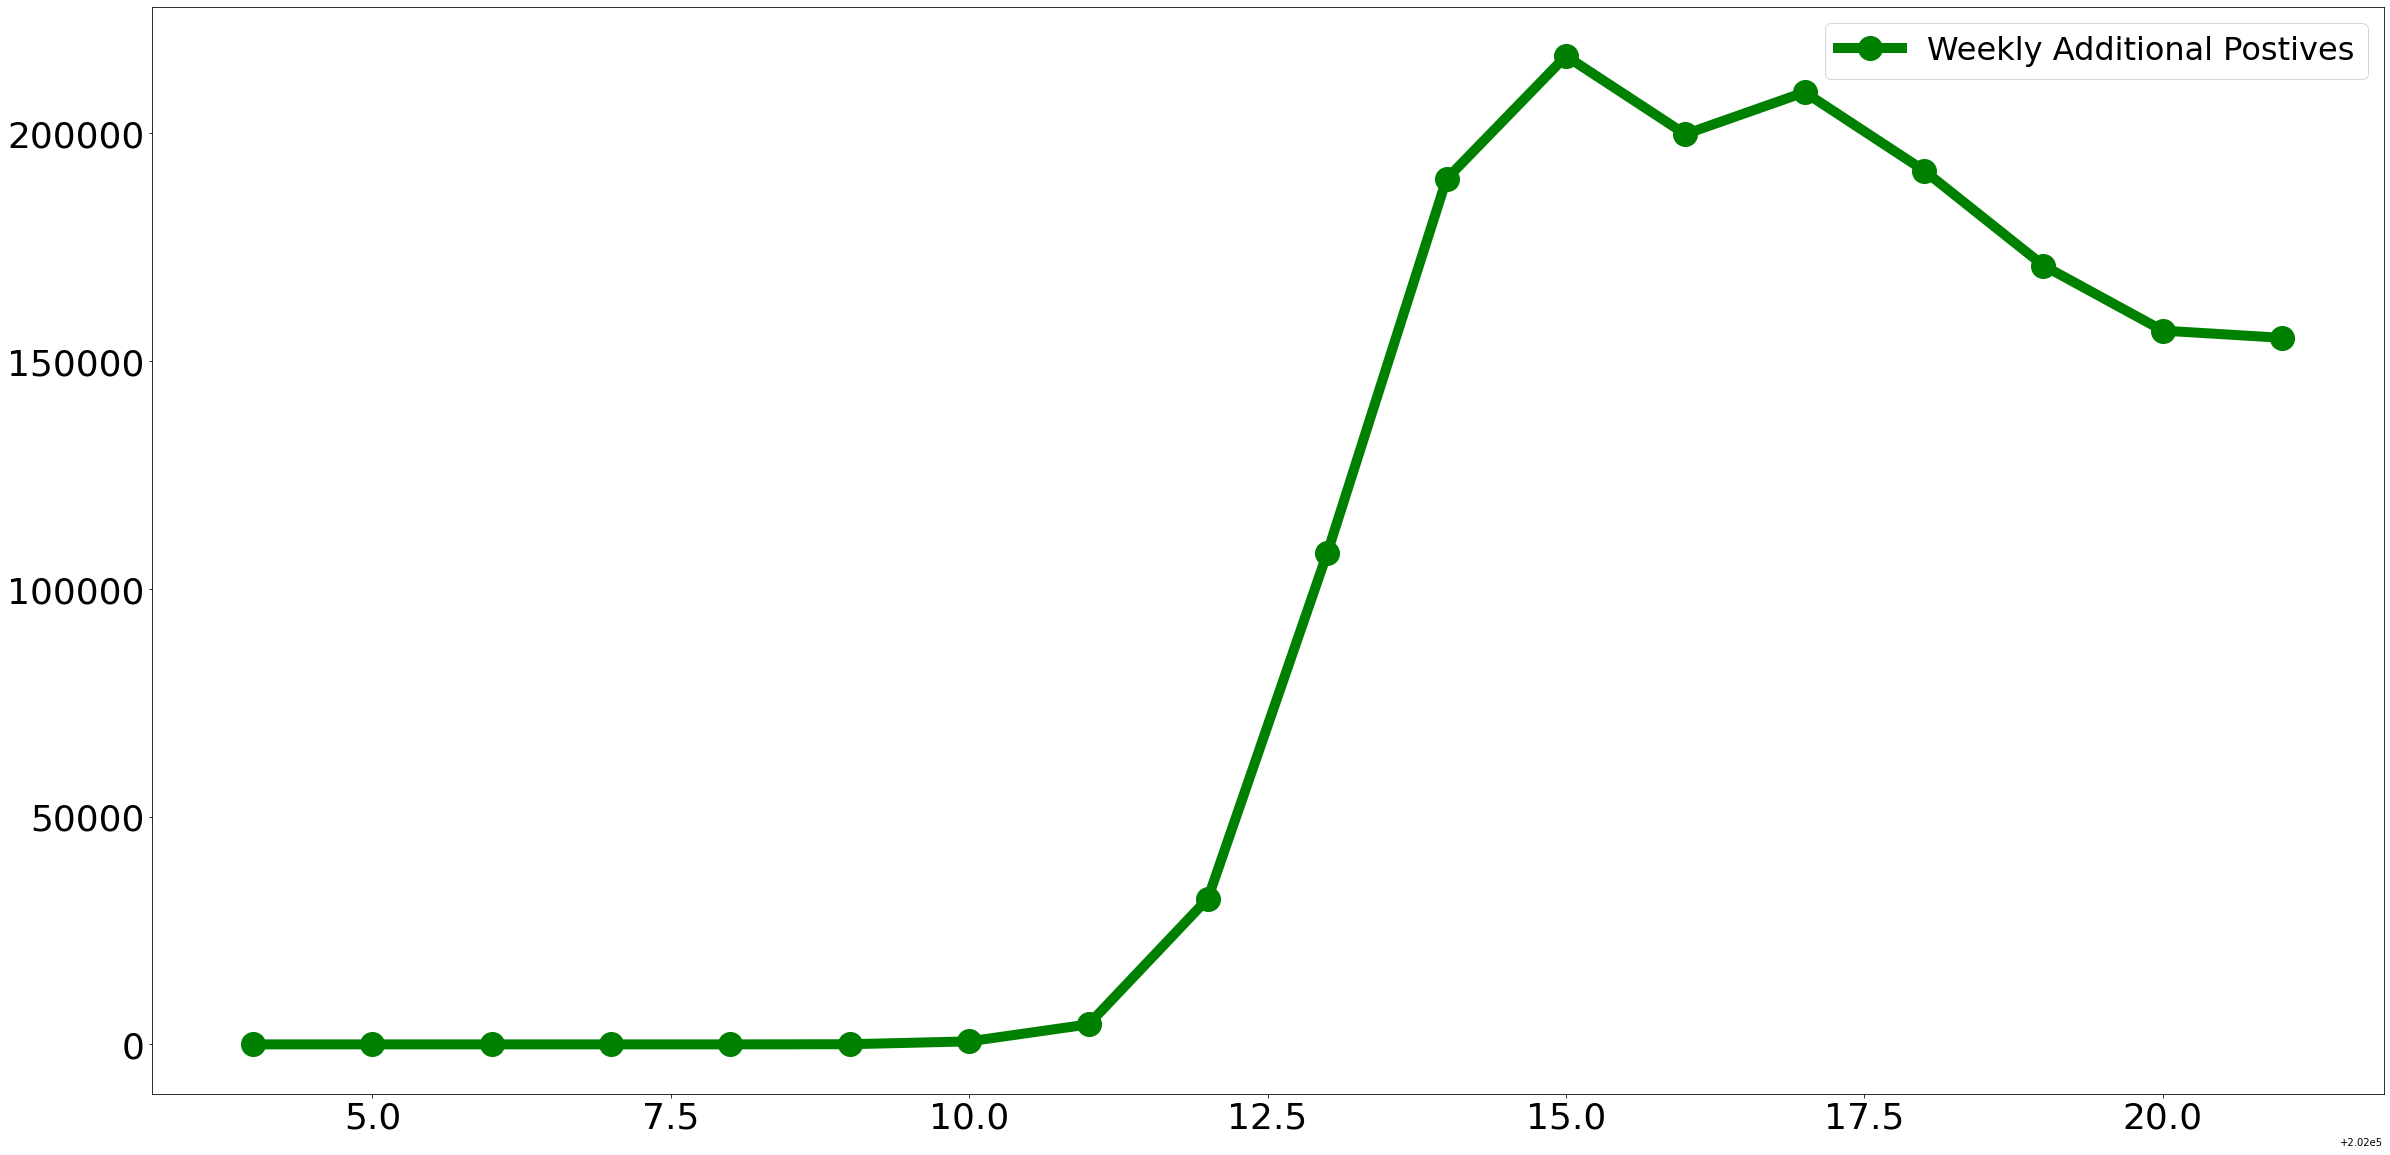

In [35]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

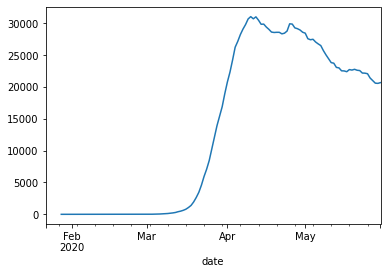

In [36]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

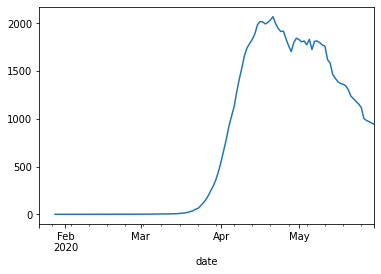

In [37]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

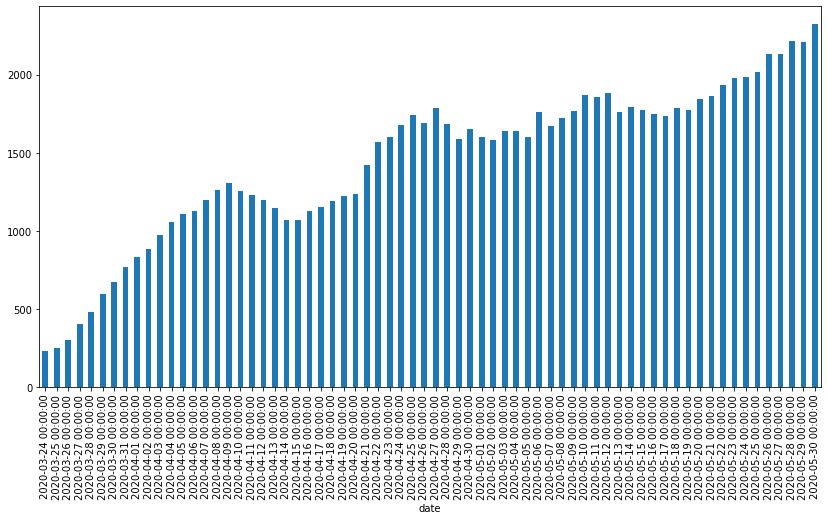

In [39]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


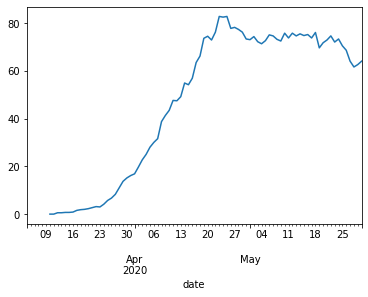

In [40]:
dfCAAvg.deathIncrease.plot.line()

In [41]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
86,AL,2020-05-30,17359,618,17359,1.000000
87,AL,2020-05-29,16823,605,17359,0.969123
88,AL,2020-05-28,16310,590,17359,0.939570
89,AL,2020-05-27,15843,581,17359,0.912668
90,AL,2020-05-26,15396,575,17359,0.886917
91,AL,2020-05-25,14730,562,17359,0.848551
92,AL,2020-05-24,14327,551,17359,0.825336
93,AL,2020-05-23,13938,546,17359,0.802926
94,AL,2020-05-22,13563,537,17359,0.781324
95,AL,2020-05-21,13119,529,17359,0.755746


In [42]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=14)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
2150,MN,2020-05-16,14969,709,24190,0.618809
2567,NC,2020-05-16,17982,652,27673,0.649803
185,AR,2020-05-16,4578,98,7013,0.652788
100,AL,2020-05-16,11523,485,17359,0.663806
4588,WI,2020-05-16,12187,453,18230,0.668513
4209,VA,2020-05-16,29683,1002,43611,0.680631
3609,PR,2020-05-16,2589,122,3718,0.696342
347,AZ,2020-05-16,13631,679,19255,0.707920
2740,NE,2020-05-16,9772,119,13654,0.715688
435,CA,2020-05-16,76793,3204,106878,0.718511


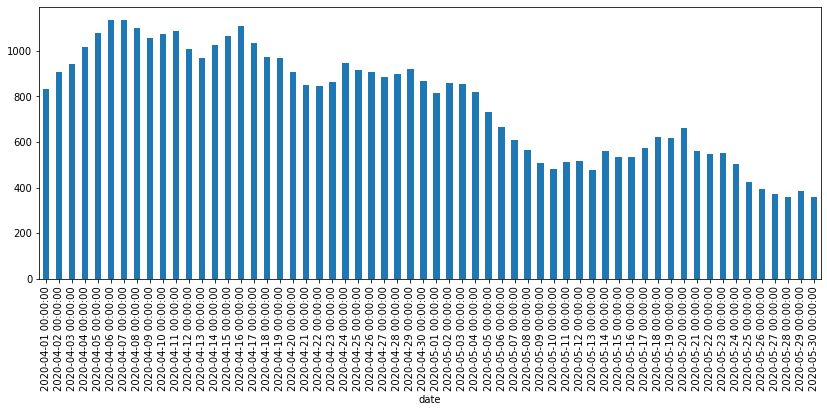

In [43]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('MI')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [44]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


In [45]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [48]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1759693
negative    14735750
pending         1668
death          97880
total       16497111
dtype: int64
Current Infection Rate 10.666674%
Percentage of US affected: 0.565920%
Observed CFR: 5.562334%
Percentage of US tested/affected: 5.055248%
Projected affected by cir = 35,012,239
Projected killed = 1,947,498


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [56]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.900218,10.308555
NJ,1.796944,8.391039
RI,1.398862,14.189403
MA,1.397185,8.451487
DC,1.235142,6.465330
CT,1.178643,6.926090
DE,0.967586,6.092749
IL,0.938437,6.921697
MD,0.860366,4.862083


In [57]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 5.025429%


In [58]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [60]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20766 entries, 0 to 20765
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         20702 non-null  object 
 1   location                         20766 non-null  object 
 2   date                             20766 non-null  object 
 3   total_cases                      20766 non-null  int64  
 4   new_cases                        20766 non-null  int64  
 5   total_deaths                     20766 non-null  int64  
 6   new_deaths                       20766 non-null  int64  
 7   total_cases_per_million          20381 non-null  float64
 8   new_cases_per_million            20381 non-null  float64
 9   total_deaths_per_million         20381 non-null  float64
 10  new_deaths_per_million           20381 non-null  float64
 11  total_tests                      5631 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [63]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    16099515.0
RUS    10316200.0
DEU     3952971.0
ITA     3824621.0
IND     3611599.0
          ...    
BOL       26190.0
MMR       23951.0
MDV       21639.0
CRI       18194.0
ZWE       16440.0
Name: total_tests, Length: 84, dtype: float64

In [64]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 51068844
Total tests done in USA : 16099515
How many more times has the world tested more than the US: 3.2


In [65]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-29
total_cases                                                            1721750
new_cases                                                                21817
total_deaths                                                            101617
new_deaths                                                                1175
total_cases_per_million                                                5201.62
new_cases_per_million                                                   65.912
total_deaths_per_million                                               306.998
new_deaths_per_million                                                    3.55
total_tests                                                        1.60995e+07
new_tests                                                               492276
total_tests_per_thousand                            

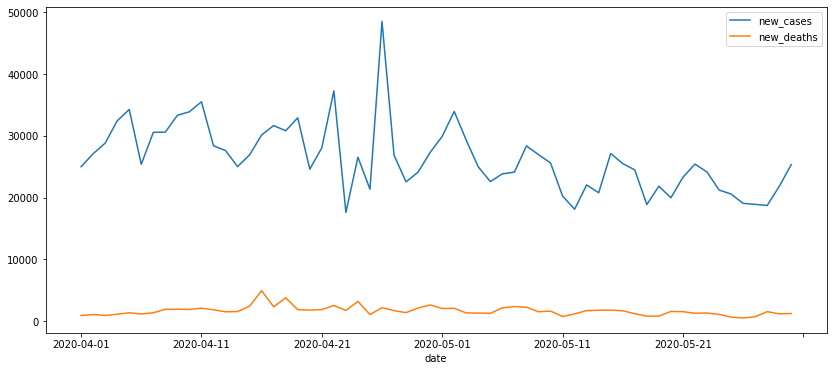

In [66]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


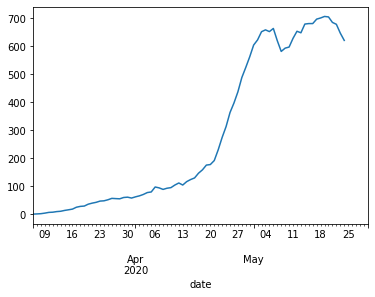

In [68]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [69]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

54497

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [71]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,286.0,895.0,71079.0,5183.0,76262.0
1,438.0,1516.0,63965.0,7529.0,71494.0
2,350.0,1766.0,-18947.0,7948.0,-10999.0
3,325.0,1130.0,51311.0,6465.0,57776.0
4,309.0,1224.0,81259.0,8198.0,89457.0
5,203.0,1095.0,81125.0,5966.0,87091.0
6,92.0,295.0,78760.0,4995.0,83755.0


# Socrata (San Francisco) Data

In [72]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [75]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

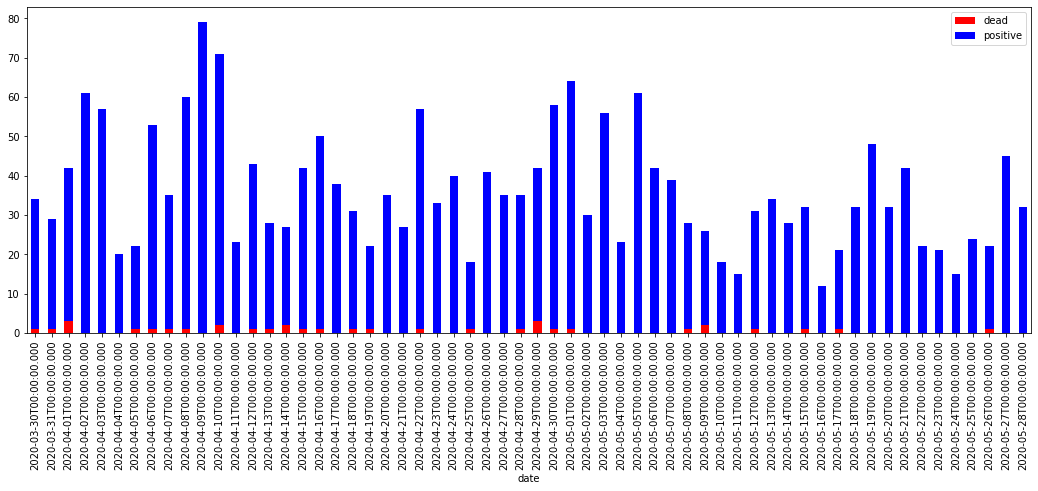

In [79]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

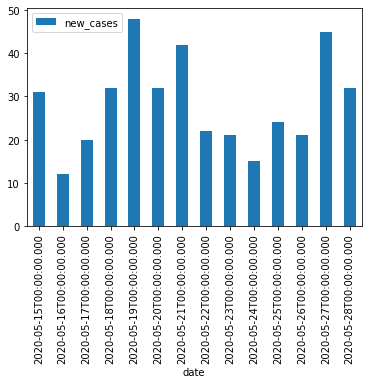

In [80]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

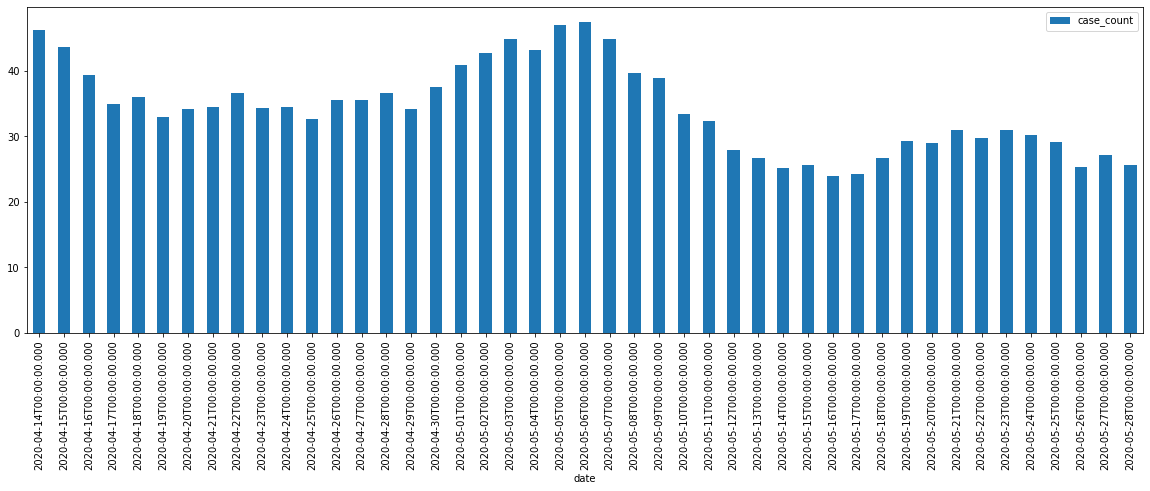

In [81]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [83]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-26,420,14.0,11796.0,52.0,269.0
2020-05-27,430,14.0,12064.0,52.0,274.0
2020-05-28,436,14.0,12428.0,52.0,289.0
2020-05-29,450,14.0,12712.0,52.0,305.0
2020-05-30,466,14.0,13186.0,52.0,312.0


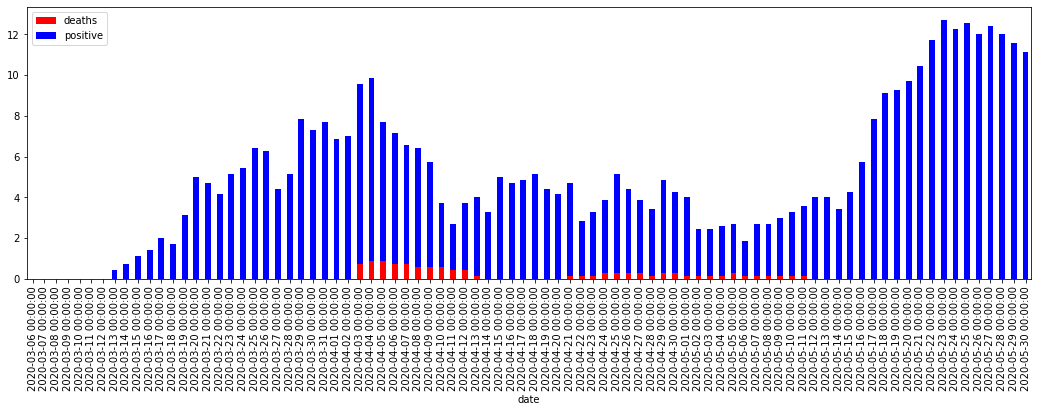

In [84]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [85]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.18%
Marin Population Tested: 5.08%


In [86]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-26    12.000000
2020-05-27    12.428571
2020-05-28    12.000000
2020-05-29    11.571429
2020-05-30    11.142857
Name: positive, dtype: float64

In [87]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-03       NaN
2020-05-04    1321.0
2020-05-05    1275.0
2020-05-06    2603.0
2020-05-07    1799.0
2020-05-08    1898.0
2020-05-09    2049.0
2020-05-10    2119.0
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
Name: positive, dtype: float64